In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
#Lectura de datos
datosGeneracion = pd.read_excel("../Datasets/Información Planta Solar Limpio.xlsx")
datosGeneracion.head(4)

,Fecha,Anio,Mes,NumMes,NumSemana,NumDiaAnio,Dia,NumDia,Hora,NumHora,...,DireccionViento,CoberturaNubes,IndiceUV,CodCondCielo,DesCondCielo,CodDirViento,DesDirViento,VelocidadRafaga,Precipitacion,DPT
0,2021-07-01 00:00:00,2021,199,7,27,180,6026,1,144600,0,...,0.0,70,0,4,Cielo nublado,4,Sureste,17.0,0.0,15.0
1,2021-07-01 01:00:00,2021,199,7,27,180,6026,1,144601,1,...,0.0,70,0,2,Poco nuboso,4,Sureste,15.0,0.0,15.0
2,2021-07-01 02:00:00,2021,199,7,27,180,6026,1,144602,2,...,0.0,70,0,2,Poco nuboso,4,Sureste,13.0,0.0,15.0
3,2021-07-01 03:00:00,2021,199,7,27,180,6026,1,144603,3,...,0.0,70,0,2,Poco nuboso,4,Sureste,13.0,0.0,16.0


In [4]:
datosGeneracion["MesDia"] = datosGeneracion["NumMes"].apply(lambda x: f"{x:02d}") + datosGeneracion["NumDia"].apply(lambda x: f"{x:02d}")

In [5]:
datos_sinfecha = datosGeneracion.drop(["Fecha", "DesCondCielo", "DesDirViento"], axis=1)
datos_sinfecha["MesDia"] = datos_sinfecha["MesDia"].astype(int)
datos_sinfecha.describe().T

,count,mean,std,min,25%,50%,75%,max
Anio,18946.0,2022.074686,0.731716,2021.0,2022.00,2022.0000,2023.000000,2023.0000
Mes,18946.0,211.514304,7.520882,199.0,205.00,212.0000,218.000000,224.0000
NumMes,18946.0,6.618072,3.318434,1.0,4.00,7.0000,9.000000,12.0000
NumSemana,18946.0,27.525546,14.637753,1.0,15.00,29.0000,39.000000,53.0000
NumDiaAnio,18946.0,183.263433,100.074673,0.0,100.00,191.0000,263.000000,360.0000
Dia,18946.0,6422.038900,228.827367,6026.0,6223.00,6423.0000,6620.000000,6817.0000
NumDia,18946.0,15.721260,8.816193,1.0,8.00,16.0000,23.000000,31.0000
Hora,18946.0,154116.742320,5492.228072,144600.0,149336.25,154135.5000,158871.750000,163608.0000
NumHora,18946.0,11.502164,6.923663,0.0,6.00,12.0000,18.000000,23.0000
Generacion,18946.0,9748.432925,12091.548030,0.0,0.00,371.2202,23559.494075,29966.1386


In [6]:
pip install tsfresh

  Obtaining dependency information for tsfresh from https://files.pythonhosted.org/packages/62/72/cf614f4dc6fa0d16f6cbf9e97d464cfdf60eca7e051bcaa3f403572c007c/tsfresh-0.20.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for dask[dataframe]>=2.9.0 from https://files.pythonhosted.org/packages/9a/83/e11961f175a6aff67a46dcf4f4f4eba709678b5a351bc4d2c913d9eb39b9/dask-2023.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for distributed>=2.11.0 from https://files.pythonhosted.org/packages/77/a6/34c16487b659de5b42942f13949af8a03c3ea0208f0cd6bcf2cd576e2c28/distributed-2023.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for stumpy>=1.7.2 from https://files.pythonhosted.org/packages/c4/9d/9752261f8fe19ab4239caf1ba3864b04a0d7ab0033155cb11f86f124a642/stumpy-1.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for cloudpickle from https://files.pythonhosted.org/packages/96/43/dae06432d0c4b1dc9e9149ad37b4ca8384cf6eb7700cd9215b177b9

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.470e+11, tolerance: 2.201e+08
  model = cd_fast.enet_coordinate_descent(


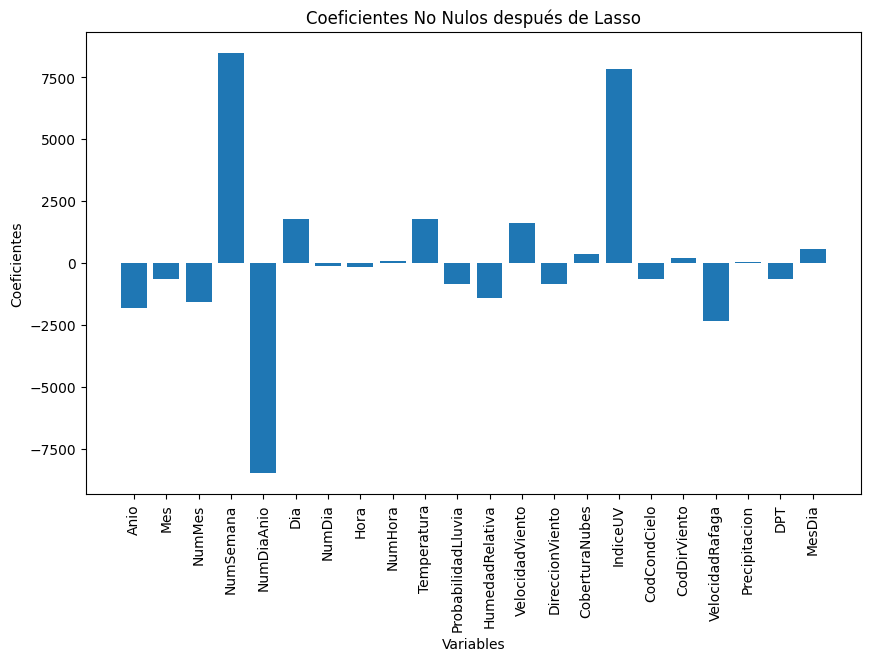

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'datos' con las variables y la variable objetivo

# Dividir los datos en variables independientes (X) y la variable dependiente (y)
X = datos_sinfecha.drop('Generacion', axis=1)
y = datos_sinfecha['Generacion']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un modelo de regresión Lasso
alpha = 0.01  # Parámetro de regularización, ajusta según sea necesario
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Obtener coeficientes no nulos (variables seleccionadas)
coeficientes_no_nulos = lasso_model.coef_

# Visualizar los coeficientes
plt.figure(figsize=(10, 6))
plt.bar(range(len(coeficientes_no_nulos)), coeficientes_no_nulos)
plt.xticks(range(len(coeficientes_no_nulos)), X.columns, rotation=90)
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.title('Coeficientes No Nulos después de Lasso')
plt.show()


Variables seleccionadas: Index(['NumHora', 'Temperatura', 'ProbabilidadLluvia', 'HumedadRelativa',
       'CoberturaNubes', 'IndiceUV'],
      dtype='object')


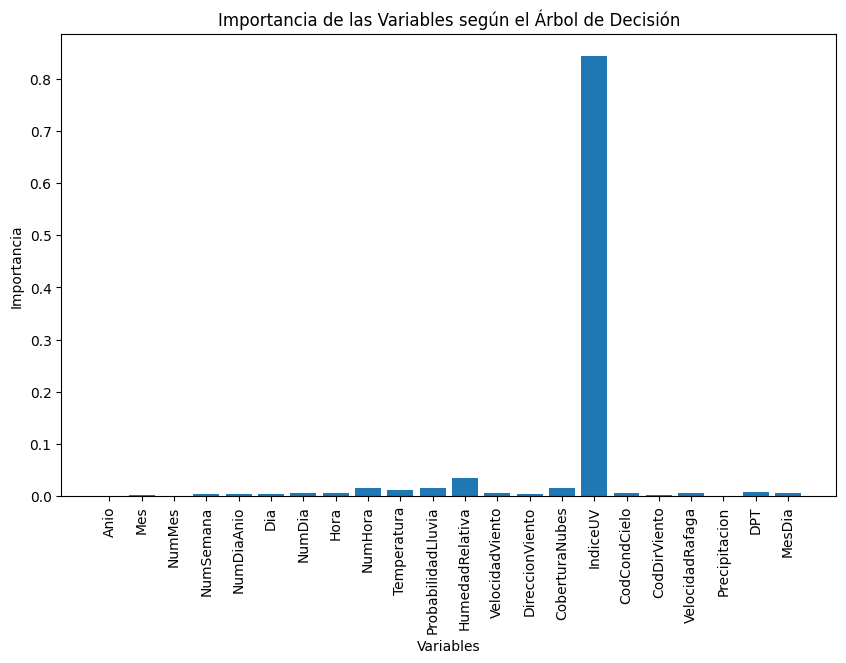

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'datos_sinfecha' con las variables y la variable objetivo 'Generacion'

# Dividir los datos en variables independientes (X) y la variable dependiente (y)
X = datos_sinfecha.drop('Generacion', axis=1)
y = datos_sinfecha['Generacion']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características (opcional, dependiendo del método utilizado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Utilizar SelectFromModel para seleccionar características basadas en la importancia de las variables
sfm = SelectFromModel(tree_model, threshold=0.01)  # Puedes ajustar el umbral según sea necesario
sfm.fit(X_train_scaled, y_train)

# Obtener las variables seleccionadas
features_selected = X.columns[sfm.get_support()]

# Visualizar las variables seleccionadas
print("Variables seleccionadas:", features_selected)

# Visualizar la importancia de todas las variables según el modelo de árbol
importances = tree_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las Variables según el Árbol de Decisión')
plt.show()


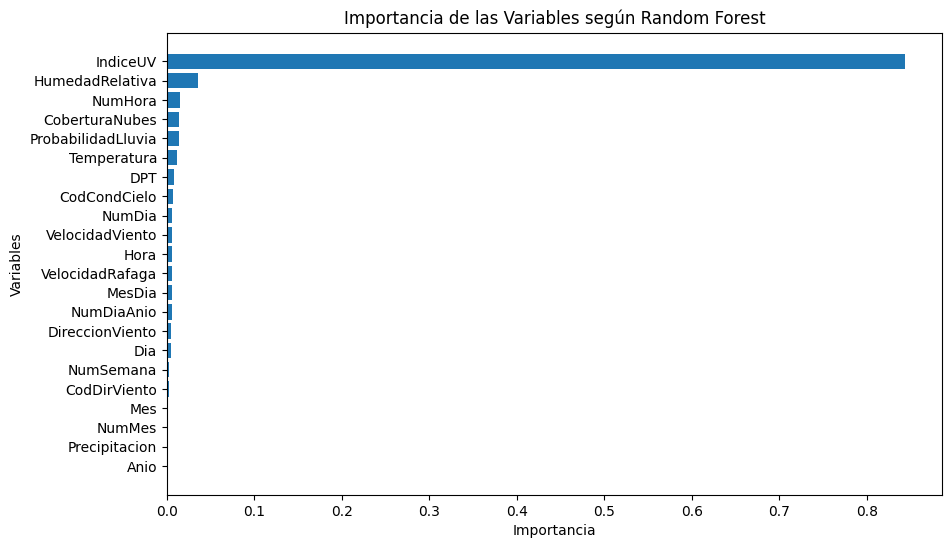

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'datos_sinfecha' con las variables y la variable objetivo 'Generacion'

# Dividir los datos en variables independientes (X) y la variable dependiente (y)
X = datos_sinfecha.drop('Generacion', axis=1)
y = datos_sinfecha['Generacion']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Obtener la importancia de las características
importances = random_forest_model.feature_importances_

# Ordenar las importancias y obtener índices ordenados
indices_ordenados = importances.argsort()

# Visualizar las importancias de las características en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices_ordenados)), importances[indices_ordenados])
plt.yticks(range(len(indices_ordenados)), X.columns[indices_ordenados])
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las Variables según Random Forest')
plt.show()


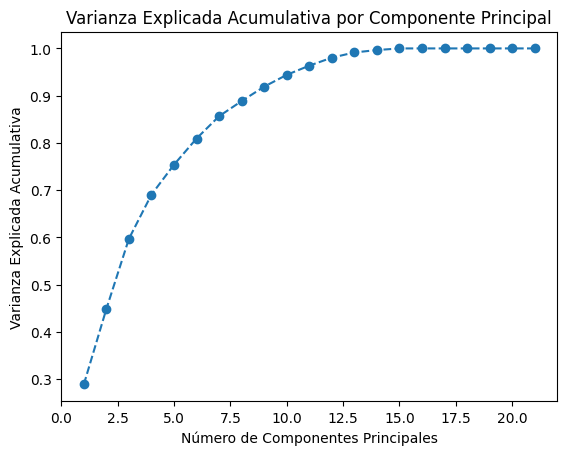

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'datos_sinfecha' con las variables y la variable objetivo 'Generacion'

# Dividir los datos en variables independientes (X) y la variable dependiente (y)
X = datos_sinfecha.drop(['Generacion', 'Precipitacion'], axis=1)
y = datos_sinfecha['Generacion']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Obtener la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Visualizar la varianza explicada acumulativa
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa por Componente Principal')
plt.show()


In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supongamos que tienes un DataFrame llamado 'datos_sinfecha' con las variables y la variable objetivo 'Generacion'

# Dividir los datos en variables independientes (X) y la variable dependiente (y)
X = datos_sinfecha.drop(['Generacion', 'Precipitacion'], axis=1)

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Obtener las cargas (pesos) de las variables en los componentes principales
loadings = pca.components_

# Crear un DataFrame para visualizar las cargas
loadings_df = pd.DataFrame(loadings, columns=X.columns)

# Mostrar las cargas para los primeros 3 componentes principales (por ejemplo)
print("Cargas de variables en los primeros 3 componentes principales:")
print(loadings_df.transpose().iloc[:, :11])


Cargas de variables en los primeros 3 componentes principales:
                          0         1         2         3         4   \
Anio                0.372459 -0.115579 -0.143590  0.138062 -0.058180   
Mes                 0.311508 -0.300434 -0.115371  0.159807 -0.053013   
NumMes             -0.279530 -0.375079  0.118465 -0.003126  0.033797   
NumSemana          -0.283094 -0.371280  0.120508 -0.006762  0.048495   
NumDiaAnio         -0.278510 -0.378284  0.119001 -0.003468  0.047206   
Dia                 0.311090 -0.302534 -0.114994  0.159145 -0.046635   
NumDia             -0.004965 -0.058569  0.013096 -0.004077  0.154216   
Hora                0.311166 -0.302497 -0.114564  0.159309 -0.046555   
NumHora             0.061593  0.022404  0.382876  0.142683  0.072163   
Temperatura         0.104465 -0.029513  0.423612  0.145433 -0.146587   
ProbabilidadLluvia -0.183130  0.156285  0.014401  0.238227  0.134182   
HumedadRelativa    -0.203070  0.004640 -0.407143  0.161426 -0.069319   
V